In [ ]:
import os
from getpass import getpass
user = input('GitHub user ')
password = getpass('GitHub password ')
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/romanenkova95/semi_supervised_CPD.git
!cd semi_supervised_CPD && git checkout alpha

Cloning into 'semi_supervised_CPD'...
remote: Enumerating objects: 161489, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 161489 (delta 54), reused 36 (delta 10), pack-reused 161348
Receiving objects: 100% (161489/161489), 135.10 MiB | 34.62 MiB/s, done.
Resolving deltas: 100% (59/59), done.
Checking out files: 100% (158866/158866), done.
Branch 'alpha' set up to track remote branch 'alpha' from 'origin'.
Switched to a new branch 'alpha'


In [ ]:
%cd semi_supervised_CPD

/content/semi_supervised_CPD


In [ ]:
!pip install pytorch_lightning
!pip install pims
!pip install ruptures
!pip install av
!pip install pytorchvideo

# Supervised TS-CP baseline

In [ ]:
from BASELINES.tscp import *
from BASELINES import tscp
from BASELINES import models as tscp_encoders
from CPD import loss, train
from CPD import models as models_original
from CPD import datasets as datasets_original
from CPD import new_metrics_2 as metrics
from Semi_Supervised_TSCP import models
from Semi_Supervised_TSCP import datasets

import datetime
import torch
import numpy as np
from torch import nn

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/_functional_video.py:7: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in 0.14. Please use the 'torchvision.transforms.functional' module instead.
  "The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in 0.14. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/_transforms_video.py:26: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in 0.14. Please use the 'torchvision.transforms' module instead.
  "The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in 0.14. "


# Synthetic 1D Experiments

In [ ]:
experiments_name = 'synthetic_1D'

## Datasets

In [ ]:
supervised_num = 25
unsupervised_num = 500

In [ ]:
supervised_train_dataset, supervised_test_dataset = datasets.CPDDatasetsNew(num=supervised_num,
                                                                            num_change=supervised_num//2,
                                                                            experiments_name=experiments_name).get_dataset_()
unsupervised_train_dataset, unsupervised_test_dataset = datasets.CPDDatasetsNew(num=unsupervised_num,
                                                                                num_change=unsupervised_num//2,
                                                                                experiments_name=experiments_name).get_dataset_()

## Models

In [ ]:
SEQ_LEN = 16
batch_size = 4
pos_numbers = 2
neg_numbers = 2

alpha=0.5

model = models.SyntheticTSCPEncoder(seq_len=SEQ_LEN, c_in=1, 
                                    nb_filters=4, 
                                    code_size=4, 
                                    n_steps=4)

tscp_model = models.TSCPModelAlpha(model=model, supervised_train_dataset=supervised_train_dataset,
                                   supervised_test_dataset=supervised_test_dataset, 
                                   unsupervised_train_dataset=unsupervised_train_dataset,
                                   unsupervised_test_dataset=unsupervised_test_dataset,
                                   batch_size=batch_size, 
                                   window_1=SEQ_LEN, window_2=SEQ_LEN,
                                   pos_numbers=pos_numbers, neg_numbers=neg_numbers, 
                                   alpha=alpha)

## Run experiments

### CPD model with original datasets -- for validation

In [ ]:
cpd_model = models_original.CPD_model(experiments_name=experiments_name, loss_type='CPD', lr=10e-4)

### Training

In [ ]:
seed = 1
tscp_model = train.train_model(tscp_model, experiments_name, max_epochs=100,
                               patience=5, gpus=0, seed=seed, 
                               min_delta=1e-4, 
                               monitor='train_loss_epoch',
                               check_val_every_n_epoch=2)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.386


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.026 >= min_delta = 0.0001. New best score: 0.360


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.007 >= min_delta = 0.0001. New best score: 0.353


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.001 >= min_delta = 0.0001. New best score: 0.353


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.019 >= min_delta = 0.0001. New best score: 0.334


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric train_loss_epoch did not improve in the last 5 records. Best score: 0.334. Signaling Trainer to stop.


In [ ]:
%reload_ext tensorboard
%tensorboard --logdir 'logs'

### Look at the predictions


In [ ]:
#device = 'cuda:0'
device = 'cpu'
tscp_model.to(device)

for inputs, labels in cpd_model.val_dataloader():
    preds = tscp.get_tscp_output_2(tscp_model, inputs.to(device), window=tscp_model.window_1).detach().cpu()
    inputs.detach().cpu()
    labels.detach().cpu()
    for i in range(5):
        plt.figure()
        plt.plot(preds[i], label='pred')
        plt.plot(labels[i], label='true labels')
        plt.legend()

## Calculate metrics

In [ ]:
threshold_number = 45
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

# cut threshold list
#threshold_list = list(threshold_list)[18:27]

In [ ]:
# evaluating on original val dataset
r, delay_list, fp_delay_list = metrics.evaluation_pipeline(tscp_model,
                                                           cpd_model.val_dataloader(),  
                                                           threshold_list, 
                                                           device=device, 
                                                           model_type='tscp',
                                                           verbose=False)
r

100%|██████████| 47/47 [02:45<00:00,  3.52s/it]


(-0.001,
 0.0,
 0.0,
 2164.47998046875,
 (0, 300, 0, 0),
 0.0,
 0.8226481119791667,
 -0.001,
 0.8226481119791667)

## FINETUNING

In [ ]:
supervised_num = 50
unsupervised_num = 500

In [ ]:
supervised_train_dataset, supervised_test_dataset = datasets.CPDDatasetsNew(num=supervised_num,
                                                                            num_change=supervised_num//2,
                                                                            experiments_name=experiments_name).get_dataset_()
unsupervised_train_dataset, unsupervised_test_dataset = datasets.CPDDatasetsNew(num=unsupervised_num,
                                                                                num_change=unsupervised_num//2,
                                                                                experiments_name=experiments_name).get_dataset_()

In [ ]:
SEQ_LEN = 16
batch_size = 4
pos_numbers = 2
neg_numbers = 2

model = models.SyntheticTSCPEncoder(seq_len=SEQ_LEN, c_in=1, 
                                    nb_filters=4, 
                                    code_size=4, 
                                    n_steps=4)

tscp_model_unsupervised = models.TSCPModelAlpha(model=model, supervised_train_dataset=supervised_train_dataset,
                                                supervised_test_dataset=supervised_test_dataset, 
                                                unsupervised_train_dataset=unsupervised_train_dataset,
                                                unsupervised_test_dataset=unsupervised_test_dataset,
                                                batch_size=batch_size, 
                                                window_1=SEQ_LEN, window_2=SEQ_LEN,
                                                pos_numbers=pos_numbers, neg_numbers=neg_numbers, 
                                                alpha=1)
tscp_model_supervised = models.TSCPModelAlpha(model=tscp_model_unsupervised.model, 
                                              supervised_train_dataset=supervised_train_dataset,
                                              supervised_test_dataset=supervised_test_dataset, 
                                              unsupervised_train_dataset=unsupervised_train_dataset,
                                              unsupervised_test_dataset=unsupervised_test_dataset,
                                              batch_size=batch_size, 
                                              window_1=SEQ_LEN, window_2=SEQ_LEN,
                                              pos_numbers=pos_numbers, neg_numbers=neg_numbers, 
                                              alpha=0)

In [ ]:
seed = 0
tscp_model_unsupervised = train.train_model(tscp_model_unsupervised, 
                                            experiments_name, max_epochs=100,
                                            patience=5, gpus=0, seed=seed, 
                                            min_delta=1e-4, 
                                            monitor='train_loss_epoch',
                                            check_val_every_n_epoch=2)

tscp_model_supervised = train.train_model(tscp_model_supervised, 
                                          experiments_name, max_epochs=10,
                                          patience=5, gpus=0, seed=seed, 
                                          min_delta=1e-4, 
                                          monitor='train_loss_epoch',
                                          check_val_every_n_epoch=2)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.304
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

In [ ]:
threshold_number = 45
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

# cut threshold list
#threshold_list = list(threshold_list)[18:27]

In [ ]:
# evaluating on original val dataset
device='cpu'
r, delay_list, fp_delay_list = metrics.evaluation_pipeline(tscp_model_supervised,
                                                           cpd_model.val_dataloader(),  
                                                           threshold_list, 
                                                           device=device, 
                                                           model_type='tscp',
                                                           verbose=True)

  2%|▏         | 1/47 [00:03<02:40,  3.49s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  4%|▍         | 2/47 [00:06<02:30,  3.35s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  6%|▋         | 3/47 [00:09<02:24,  3.29s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  9%|▊         | 4/47 [00:13<02:24,  3.36s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 11%|█         | 5/47 [00:16<02:21,  3.37s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 13%|█▎        | 6/47 [00:20<02:17,  3.34s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 15%|█▍        | 7/47 [00:23<02:12,  3.30s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 17%|█▋        | 8/47 [00:26<02:08,  3.29s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 19%|█▉        | 9/47 [00:29<02:04,  3.28s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 21%|██▏       | 10/47 [00:33<02:01,  3.29s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 23%|██▎       | 11/47 [00:36<01:58,  3.29s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 26%|██▌       | 12/47 [00:39<01:55,  3.30s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 28%|██▊       | 13/47 [00:43<01:52,  3.30s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 30%|██▉       | 14/47 [00:46<01:50,  3.33s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 32%|███▏      | 15/47 [00:50<01:48,  3.40s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 34%|███▍      | 16/47 [00:53<01:46,  3.43s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 36%|███▌      | 17/47 [00:56<01:41,  3.40s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 38%|███▊      | 18/47 [01:00<01:42,  3.52s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 40%|████      | 19/47 [01:03<01:36,  3.46s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 43%|████▎     | 20/47 [01:08<01:40,  3.74s/it]

TN: 16, FP: 208, FN: 19, TP: 57, DELAY:7.773333549499512, FP_DELAY:62.43000030517578, COVER: 0.758007410983346
TN: 115, FP: 42, FN: 21, TP: 122, DELAY:8.036666870117188, FP_DELAY:95.93000030517578, COVER: 0.9440813069455813


 45%|████▍     | 21/47 [01:14<01:58,  4.55s/it]

TN: 128, FP: 18, FN: 21, TP: 133, DELAY:8.206666946411133, FP_DELAY:98.61333465576172, COVER: 0.9608712939456927


 49%|████▉     | 23/47 [01:24<01:51,  4.65s/it]

TN: 136, FP: 10, FN: 21, TP: 133, DELAY:8.329999923706055, FP_DELAY:100.15333557128906, COVER: 0.9690837792629653


 51%|█████     | 24/47 [01:30<01:52,  4.91s/it]

TN: 137, FP: 7, FN: 22, TP: 134, DELAY:8.34333324432373, FP_DELAY:100.63666534423828, COVER: 0.971953173758914


 53%|█████▎    | 25/47 [01:35<01:51,  5.05s/it]

TN: 137, FP: 6, FN: 22, TP: 135, DELAY:8.34666633605957, FP_DELAY:100.9366683959961, COVER: 0.972997159595436


 55%|█████▌    | 26/47 [01:39<01:37,  4.66s/it]

TN: 137, FP: 6, FN: 22, TP: 135, DELAY:8.376667022705078, FP_DELAY:100.9366683959961, COVER: 0.9725734669988443


 57%|█████▋    | 27/47 [01:42<01:24,  4.24s/it]

TN: 139, FP: 4, FN: 22, TP: 135, DELAY:8.453332901000977, FP_DELAY:101.2066650390625, COVER: 0.9740898744521691


 60%|█████▉    | 28/47 [01:45<01:15,  3.95s/it]

TN: 142, FP: 0, FN: 25, TP: 133, DELAY:9.133333206176758, FP_DELAY:102.67333221435547, COVER: 0.9749070801483686


 62%|██████▏   | 29/47 [01:49<01:07,  3.74s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 64%|██████▍   | 30/47 [01:52<01:02,  3.69s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 66%|██████▌   | 31/47 [01:55<00:57,  3.59s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667
TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 70%|███████   | 33/47 [02:02<00:48,  3.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 72%|███████▏  | 34/47 [02:06<00:44,  3.42s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 74%|███████▍  | 35/47 [02:09<00:40,  3.37s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 77%|███████▋  | 36/47 [02:12<00:36,  3.35s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667
TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 81%|████████  | 38/47 [02:19<00:31,  3.46s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 83%|████████▎ | 39/47 [02:22<00:27,  3.43s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 85%|████████▌ | 40/47 [02:26<00:25,  3.57s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 87%|████████▋ | 41/47 [02:31<00:23,  4.00s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 89%|████████▉ | 42/47 [02:36<00:21,  4.25s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 91%|█████████▏| 43/47 [02:40<00:16,  4.15s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 94%|█████████▎| 44/47 [02:44<00:11,  3.96s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 96%|█████████▌| 45/47 [02:47<00:07,  3.83s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 98%|█████████▊| 46/47 [02:50<00:03,  3.68s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


100%|██████████| 47/47 [02:54<00:00,  3.71s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667
AUC: 1107.6227
Time to FA 102.6733, delay detection 9.1333 for best-F1 threshold: 0.7128
TN 142, FP 0, FN 25, TP 133 for best-F1 threshold: 0.7128
Max F1 0.9141: for best-F1 threshold 0.7128
COVER 0.9749: for best-F1 threshold 0.7128
Max COVER 0.9749: for threshold 0.7128


In [ ]:
seed = 2
SEQ_LEN = 16
batch_size = 4
pos_numbers = 2
neg_numbers = 2

model = models.SyntheticTSCPEncoder(seq_len=SEQ_LEN, c_in=1, 
                                        nb_filters=4, 
                                        code_size=4, 
                                        n_steps=4)

tscp_model_unsupervised = models.TSCPModelAlpha(model=model, supervised_train_dataset=supervised_train_dataset,
                                                    supervised_test_dataset=supervised_test_dataset, 
                                                    unsupervised_train_dataset=unsupervised_train_dataset,
                                                    unsupervised_test_dataset=unsupervised_test_dataset,
                                                    batch_size=batch_size, 
                                                    window_1=SEQ_LEN, window_2=SEQ_LEN,
                                                    pos_numbers=pos_numbers, neg_numbers=neg_numbers, 
                                                    alpha=1)

tscp_model_unsupervised = train.train_model(tscp_model_unsupervised, 
                                            experiments_name, max_epochs=100,
                                            patience=5, gpus=0, seed=seed, 
                                            min_delta=1e-4, 
                                            monitor='train_loss_epoch',
                                            check_val_every_n_epoch=2)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.305


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.005 >= min_delta = 0.0001. New best score: 0.300


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.000 >= min_delta = 0.0001. New best score: 0.299


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.003 >= min_delta = 0.0001. New best score: 0.297


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.002 >= min_delta = 0.0001. New best score: 0.295


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.003 >= min_delta = 0.0001. New best score: 0.292


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.002 >= min_delta = 0.0001. New best score: 0.290


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.001 >= min_delta = 0.0001. New best score: 0.289


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.002 >= min_delta = 0.0001. New best score: 0.288


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.004 >= min_delta = 0.0001. New best score: 0.284


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.008 >= min_delta = 0.0001. New best score: 0.275


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.011 >= min_delta = 0.0001. New best score: 0.264


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.008 >= min_delta = 0.0001. New best score: 0.256


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.012 >= min_delta = 0.0001. New best score: 0.244


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.025 >= min_delta = 0.0001. New best score: 0.218


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.002 >= min_delta = 0.0001. New best score: 0.216


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.004 >= min_delta = 0.0001. New best score: 0.213


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.011 >= min_delta = 0.0001. New best score: 0.202


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.009 >= min_delta = 0.0001. New best score: 0.193


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.004 >= min_delta = 0.0001. New best score: 0.189


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.003 >= min_delta = 0.0001. New best score: 0.186


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.023 >= min_delta = 0.0001. New best score: 0.163


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric train_loss_epoch did not improve in the last 5 records. Best score: 0.163. Signaling Trainer to stop.


In [ ]:
device = 'cpu'

In [ ]:
r, delay_list, fp_delay_list = metrics.evaluation_pipeline(tscp_model_unsupervised,
                                                           cpd_model.val_dataloader(),  
                                                           threshold_list, 
                                                           device=device, 
                                                           model_type='tscp',
                                                           verbose=True)

  2%|▏         | 1/47 [00:03<02:40,  3.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  4%|▍         | 2/47 [00:06<02:28,  3.29s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  6%|▋         | 3/47 [00:09<02:25,  3.32s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  9%|▊         | 4/47 [00:13<02:19,  3.23s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 11%|█         | 5/47 [00:16<02:13,  3.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 13%|█▎        | 6/47 [00:19<02:17,  3.34s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667
TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 17%|█▋        | 8/47 [00:26<02:10,  3.35s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 19%|█▉        | 9/47 [00:29<02:08,  3.38s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 21%|██▏       | 10/47 [00:33<02:03,  3.35s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 23%|██▎       | 11/47 [00:36<02:00,  3.35s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 26%|██▌       | 12/47 [00:40<01:58,  3.39s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 28%|██▊       | 13/47 [00:43<01:56,  3.42s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 30%|██▉       | 14/47 [00:47<01:54,  3.46s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 32%|███▏      | 15/47 [00:50<01:50,  3.45s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 34%|███▍      | 16/47 [00:53<01:43,  3.35s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 36%|███▌      | 17/47 [00:57<01:43,  3.44s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 38%|███▊      | 18/47 [01:01<01:47,  3.71s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 40%|████      | 19/47 [01:04<01:40,  3.60s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 43%|████▎     | 20/47 [01:08<01:35,  3.53s/it]

TN: 0, FP: 262, FN: 18, TP: 20, DELAY:7.5966668128967285, FP_DELAY:36.503334045410156, COVER: 0.7196267778899312


 45%|████▍     | 21/47 [01:11<01:31,  3.50s/it]

TN: 0, FP: 260, FN: 18, TP: 22, DELAY:7.603333473205566, FP_DELAY:36.88333511352539, COVER: 0.7186274578629569


 47%|████▋     | 22/47 [01:14<01:24,  3.40s/it]

TN: 0, FP: 260, FN: 19, TP: 21, DELAY:7.949999809265137, FP_DELAY:37.779998779296875, COVER: 0.716683820601239


 49%|████▉     | 23/47 [01:18<01:21,  3.40s/it]

TN: 0, FP: 260, FN: 19, TP: 21, DELAY:7.956666469573975, FP_DELAY:39.02333450317383, COVER: 0.7139425084917022


 51%|█████     | 24/47 [01:21<01:18,  3.41s/it]

TN: 0, FP: 257, FN: 19, TP: 24, DELAY:7.989999771118164, FP_DELAY:40.893333435058594, COVER: 0.7076065267717268


 53%|█████▎    | 25/47 [01:24<01:13,  3.33s/it]

TN: 0, FP: 249, FN: 19, TP: 32, DELAY:8.079999923706055, FP_DELAY:45.87666702270508, COVER: 0.6964315559679648


 55%|█████▌    | 26/47 [01:28<01:12,  3.46s/it]

TN: 7, FP: 218, FN: 21, TP: 54, DELAY:8.90333366394043, FP_DELAY:60.2933349609375, COVER: 0.7330368810505328


 57%|█████▋    | 27/47 [01:32<01:08,  3.43s/it]

TN: 122, FP: 33, FN: 55, TP: 90, DELAY:15.603333473205566, FP_DELAY:101.9433364868164, COVER: 0.8923470827222311


 60%|█████▉    | 28/47 [01:35<01:05,  3.43s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 62%|██████▏   | 29/47 [01:39<01:02,  3.50s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 64%|██████▍   | 30/47 [01:42<00:59,  3.52s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 66%|██████▌   | 31/47 [01:46<00:55,  3.49s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 68%|██████▊   | 32/47 [01:49<00:53,  3.57s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 70%|███████   | 33/47 [01:53<00:49,  3.51s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 72%|███████▏  | 34/47 [01:56<00:45,  3.51s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 74%|███████▍  | 35/47 [02:00<00:41,  3.46s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 77%|███████▋  | 36/47 [02:03<00:37,  3.37s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 79%|███████▊  | 37/47 [02:06<00:32,  3.30s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 81%|████████  | 38/47 [02:10<00:30,  3.41s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 83%|████████▎ | 39/47 [02:13<00:27,  3.45s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 85%|████████▌ | 40/47 [02:16<00:23,  3.42s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 87%|████████▋ | 41/47 [02:20<00:20,  3.42s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 89%|████████▉ | 42/47 [02:23<00:16,  3.34s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 91%|█████████▏| 43/47 [02:27<00:13,  3.39s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 94%|█████████▎| 44/47 [02:30<00:10,  3.39s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 96%|█████████▌| 45/47 [02:33<00:06,  3.35s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 98%|█████████▊| 46/47 [02:37<00:03,  3.35s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


100%|██████████| 47/47 [02:40<00:00,  3.42s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667
AUC: 1490.0293
Time to FA 101.9433, delay detection 15.6033 for best-F1 threshold: 0.6641
TN 122, FP 33, FN 55, TP 90 for best-F1 threshold: 0.6641
Max F1 0.6716: for best-F1 threshold 0.6641
COVER 0.8923: for best-F1 threshold 0.6641
Max COVER 0.8923: for threshold 0.6641


In [ ]:
y = []
err = []
for max_epochs in [0, 1, 2, 3, 4, 5, 10, 15, 20]:
  auc = []
  max_cover = []
  f1_score = []

  for seed in [0, 1, 2]:
    tscp_model_supervised = models.TSCPModelAlpha(model=tscp_model_unsupervised.model, 
                                                  supervised_train_dataset=supervised_train_dataset,
                                                  supervised_test_dataset=supervised_test_dataset, 
                                                  unsupervised_train_dataset=unsupervised_train_dataset,
                                                  unsupervised_test_dataset=unsupervised_test_dataset,
                                                  batch_size=batch_size, 
                                                  window_1=SEQ_LEN, window_2=SEQ_LEN,
                                                  pos_numbers=pos_numbers, neg_numbers=neg_numbers, 
                                                  alpha=0)

    tscp_model_supervised = train.train_model(tscp_model_supervised, 
                                          experiments_name, max_epochs=max_epochs,
                                          patience=5, gpus=0, seed=seed, 
                                          min_delta=1e-4, 
                                          monitor='train_loss_epoch',
                                          check_val_every_n_epoch=2)
    
    r, delay_list, fp_delay_list = metrics.evaluation_pipeline(tscp_model_supervised,
                                                           cpd_model.val_dataloader(),  
                                                           threshold_list, 
                                                           device=device, 
                                                           model_type='tscp',
                                                           verbose=False)
    auc.append(r[3])
    max_cover.append(r[8])
    f1_score.append(r[5])

  auc = np.array(auc)
  max_cover = np.array(max_cover)
  f1_score = np.array(f1_score)

  y.append(f1_score.mean())
  err.append(f1_score.std())

  print('max_epoch: ', max_epochs)
  print('auc mean: %.4f' % auc.mean(), 'auc std: %.4f' % auc.std())
  print('f1_score mean: %.4f' % f1_score.mean(), 'f1_score std: %.4f' % f1_score.std())
  print('max_cover mean: %.4f' % max_cover.mean(), 'max_cover std: %.4f' % max_cover.std())
  print('='*120)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=0` reached.
100%|██████████| 47/47 [02:41<00:00,  3.43s/it]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=0` reached.
100%|██████████| 47/47 [02:39<00:00,  3.39s/it]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=0` reached.
100%|██████████| 47/47 [02:40<00:00,  3.43s/it]

max_epoch:  0
auc mean: 1490.0293 auc std: 0.0000
f1_score mean: 0.6716 f1_score std: 0.0000
max_cover mean: 0.8923 max_cover std: 0.0000



INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████| 47/47 [02:41<00:00,  3.44s/it]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████| 47/47 [02:43<00:00,  3.48s/it]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████| 47/47 [02:47<00:00,  3.57s/it]

max_epoch:  1
auc mean: 1240.3684 auc std: 34.5952
f1_score mean: 0.8873 f1_score std: 0.0207
max_cover mean: 0.9615 max_cover std: 0.0090



INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.308
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.
100%|██████████| 47/47 [02:50<00:00,  3.63s/it]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.298
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.
100%|██████████| 47/47 [02:41<00:00,  3.44s/it]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.295
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.
100%|██████████| 47/47 [02:42<00:00,  3.46s/it]

max_epoch:  2
auc mean: 1199.6192 auc std: 4.5594
f1_score mean: 0.9040 f1_score std: 0.0036
max_cover mean: 0.9709 max_cover std: 0.0018



INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.296
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
100%|██████████| 47/47 [02:43<00:00,  3.49s/it]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.285
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
100%|██████████| 47/47 [02:41<00:00,  3.44s/it]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.282
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
100%|██████████| 47/47 [02:42<00:00,  3.46s/it]

max_epoch:  3
auc mean: 1189.3978 auc std: 9.0754
f1_score mean: 0.9252 f1_score std: 0.0030
max_cover mean: 0.9781 max_cover std: 0.0008



INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.282


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.001 >= min_delta = 0.0001. New best score: 0.281
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=4` reached.
100%|██████████| 47/47 [02:43<00:00,  3.48s/it]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.277


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=4` reached.
100%|██████████| 47/47 [02:43<00:00,  3.48s/it]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.277


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=4` reached.
100%|██████████| 47/47 [02:35<00:00,  3.31s/it]

max_epoch:  4
auc mean: 1127.9910 auc std: 13.3004
f1_score mean: 0.9288 f1_score std: 0.0000
max_cover mean: 0.9802 max_cover std: 0.0001



INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.278


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
100%|██████████| 47/47 [02:33<00:00,  3.26s/it]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.275


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
100%|██████████| 47/47 [02:33<00:00,  3.26s/it]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.275


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.001 >= min_delta = 0.0001. New best score: 0.274
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
100%|██████████| 47/47 [02:35<00:00,  3.30s/it]

max_epoch:  5
auc mean: 1131.0608 auc std: 15.8516
f1_score mean: 0.9288 f1_score std: 0.0000
max_cover mean: 0.9804 max_cover std: 0.0000



INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.276


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.001 >= min_delta = 0.0001. New best score: 0.274


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.004 >= min_delta = 0.0001. New best score: 0.270


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
100%|██████████| 47/47 [02:35<00:00,  3.30s/it]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.272


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.003 >= min_delta = 0.0001. New best score: 0.269


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
100%|██████████| 47/47 [02:36<00:00,  3.33s/it]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.272


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.002 >= min_delta = 0.0001. New best score: 0.271


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.003 >= min_delta = 0.0001. New best score: 0.267
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
100%|██████████| 47/47 [02:35<00:00,  3.31s/it]

max_epoch:  10
auc mean: 1163.7966 auc std: 3.6990
f1_score mean: 0.9177 f1_score std: 0.0092
max_cover mean: 0.9755 max_cover std: 0.0029



INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.272


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.001 >= min_delta = 0.0001. New best score: 0.271


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.004 >= min_delta = 0.0001. New best score: 0.267


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.
100%|██████████| 47/47 [02:39<00:00,  3.38s/it]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.269


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.004 >= min_delta = 0.0001. New best score: 0.266


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.
100%|██████████| 47/47 [02:57<00:00,  3.78s/it]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.271


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.002 >= min_delta = 0.0001. New best score: 0.269


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.004 >= min_delta = 0.0001. New best score: 0.266


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.
100%|██████████| 47/47 [02:55<00:00,  3.72s/it]

max_epoch:  15
auc mean: 1132.4999 auc std: 19.2155
f1_score mean: 0.9090 f1_score std: 0.0070
max_cover mean: 0.9728 max_cover std: 0.0025



INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.270


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.001 >= min_delta = 0.0001. New best score: 0.270


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.003 >= min_delta = 0.0001. New best score: 0.266


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric train_loss_epoch did not improve in the last 5 records. Best score: 0.266. Signaling Trainer to stop.
100%|██████████| 47/47 [02:53<00:00,  3.68s/it]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.268


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.003 >= min_delta = 0.0001. New best score: 0.265


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.001 >= min_delta = 0.0001. New best score: 0.264


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.
100%|██████████| 47/47 [02:51<00:00,  3.66s/it]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                 | Params
-----------------------------------------------
0 | model | SyntheticTSCPEncoder | 1.6 K 
-----------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved. New best score: 0.269


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.001 >= min_delta = 0.0001. New best score: 0.268


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss_epoch improved by 0.004 >= min_delta = 0.0001. New best score: 0.264


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric train_loss_epoch did not improve in the last 5 records. Best score: 0.264. Signaling Trainer to stop.
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.
100%|██████████| 47/47 [02:53<00:00,  3.68s/it]

max_epoch:  20
auc mean: 1048.8060 auc std: 32.0784
f1_score mean: 0.8883 f1_score std: 0.0135
max_cover mean: 0.9673 max_cover std: 0.0048


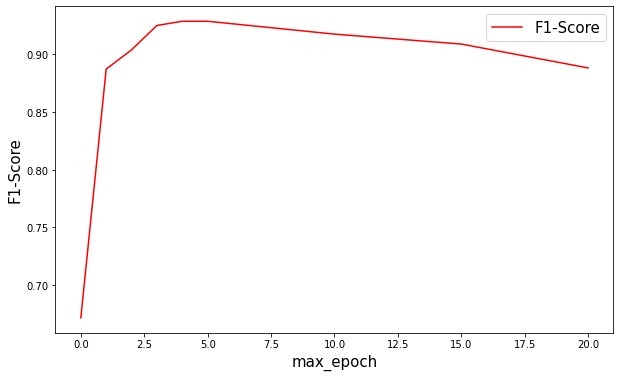

In [ ]:
s = [0, 1, 2, 3, 4, 5, 10, 15, 20]
plt.figure(figsize=(10, 6))

plt.plot(s, y, color='red', label='F1-Score')

plt.xlabel('max_epoch', fontsize=15)
plt.ylabel('F1-Score', fontsize=15)

#plt.errorbar(s, y, yerr=err, fmt=' ',capsize=4, elinewidth=1, ecolor='blue', label = 'Standard deviation')

plt.legend(fontsize=15)

plt.show()